In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Breast Cancer Wisconsin (Diagnostic) dataset
--------------------------------------------

**Dataset Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of the Breast Cancer Wisconsin (Diagnostic) dataset from UCI Machine Learning.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

In [2]:
#Load dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [3]:
y.sum()

357

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler() model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [6]:
# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.923
k: 3, Train/Test Score: 0.946/0.923
k: 5, Train/Test Score: 0.939/0.937
k: 7, Train/Test Score: 0.932/0.930
k: 9, Train/Test Score: 0.937/0.923
k: 11, Train/Test Score: 0.937/0.923
k: 13, Train/Test Score: 0.934/0.923
k: 15, Train/Test Score: 0.939/0.923
k: 17, Train/Test Score: 0.937/0.916
k: 19, Train/Test Score: 0.937/0.916


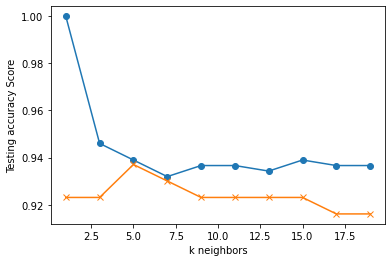

In [7]:
# Loop through different k values to finr which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [8]:
# Note that k: 5 provides the best accuracy 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.937


In [9]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)
cm

array([[50,  5],
       [ 4, 84]], dtype=int64)

In [10]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.94      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### Instead of a pure binary output, the KNN model also has a `predict_proba()` method, which returns probability estimates for given input. 

For example, here are the first 10 predictions of the testing set.

In [11]:
knn.predict(X_test_scaled[0:10])

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

And, here are the first 10 probability estimates of the testing set. 

In [12]:
# Note that each pair always adds up to exactly 1
knn.predict_proba(X_test_scaled[0:10])

array([[0.6, 0.4],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6]])

We're concerned only with the second column. The `predict()` method is setting a cutoff of 0.5. If the predicted probability is  0.5 or greater, it returns 1. Otherwise, it returns 0.

In [13]:
knn.predict_proba(X_test_scaled[0:10])[:,1]

array([0.4, 0.4, 1. , 0. , 0.2, 0. , 0. , 0.2, 1. , 0.6])

What if we want to use a different cutoff value? If we increase the cutoff, we increase the rate of false negatives. If we decrease the cutoff, we increase the rate of false positives.

The receiver operating characteristic (ROC) curve helps us visualize this tradeoff. The false positive rate and the true positive rate are calculated for several thresholds, and we plot them against each other.

In [14]:
from sklearn.metrics import roc_curve

In [15]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

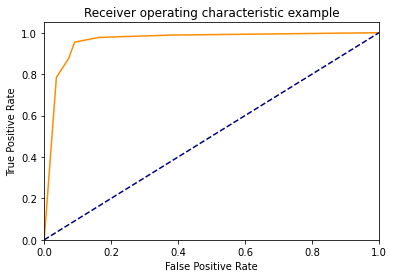

In [16]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

We can also measure the area under the curve (AUC) for another measure of the robustness of the model. An AUC of 0.5 means that the model is no more predictive than random chance. An AUC of 1.0 is as good as a model can theoretically get. (This means that for any chosen cutoff point between 0 and 1, the model is perfectly accurate).

In [17]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
roc_auc

0.9604338842975206